# Proyecto de análisis EDA

El análisis de EDA deberá realizarse en un Jupyter Notebook y considerar los siguientes puntos:

Descripción de los datos.

Limpieza de datos.

Missing values.

Visualización de datos.

Referencias.

In [20]:
import pandas as ps
data = pd.read_csv("who_suicide_statistics.csv")
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [23]:
data = data.drop_duplicates()

# Contar valores faltantes por columna
missing_values = data.isnull().sum()
print(missing_values)


country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64


In [27]:
# Imputar valores faltantes con la mediana
data['suicides_no'].fillna(data['suicides_no'].median(), inplace=True)
data['population'].fillna(data['population'].median(), inplace=True)

data = data.drop_duplicates()

# Contar valores faltantes por columna
missing_values = data.isnull().sum()
print(missing_values)

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64


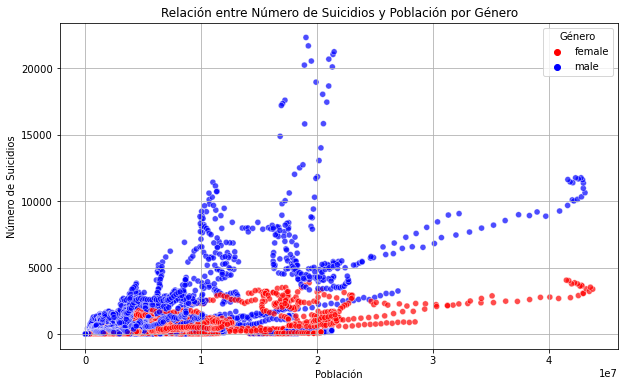

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
data = pd.read_csv("who_suicide_statistics.csv")

# Seleccionar las dos columnas para el gráfico de dispersión
x = data['population']
y = data['suicides_no']
gender = data['sex']

# Mapear género a colores
palette = {"male": "blue", "female": "red"}

# Crear el gráfico de dispersión con colores según el género
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=gender, palette=palette, alpha=0.7)
plt.title('Relación entre Número de Suicidios y Población por Género')
plt.xlabel('Población')
plt.ylabel('Número de Suicidios')
plt.grid(True)
plt.legend(title='Género')
plt.show()


El gráfico de dispersión anterior representa la relación entre el número de suicidios y la población, y utiliza colores para distinguir entre género (masculino y femenino). A continuación, describiré e interpretaré el gráfico:

1. **Eje X (Población)**: El eje horizontal muestra la población en el eje X. Cada punto en el gráfico representa un país, y su posición en el eje X indica la población de ese país. A medida que avanzas hacia la derecha en el eje X, la población de los países aumenta.

2. **Eje Y (Número de Suicidios)**: El eje vertical muestra el número de suicidios en el eje Y. Cada punto en el gráfico representa un país, y su posición en el eje Y indica el número de suicidios en ese país. A medida que subes en el eje Y, el número de suicidios aumenta.

3. **Colores (Género)**: Los puntos en el gráfico se colorean según el género. En este caso, los puntos azules representan el género masculino, y los puntos rojos representan el género femenino.

Interpretación:

- Observando los puntos en el gráfico, puedes ver que hay una amplia dispersión de datos. Algunos países tienen un alto número de suicidios y otros tienen un bajo número.

- No parece haber una correlación obvia entre la población de un país y el número de suicidios. En otras palabras, no puedes decir que los países con una población mayor o menor tienden a tener más o menos suicidios de manera consistente.

- La distinción de género (azul para masculino, rojo para femenino) te permite visualizar si hay diferencias en la distribución de suicidios entre géneros. En este caso, no parece haber una diferencia clara en la distribución de suicidios entre hombres y mujeres en función de la población.

- Los puntos dispersos sugieren que existen otros factores que influyen en el número de suicidios en un país, y estos factores pueden variar considerablemente de un país a otro.

En general, el gráfico de dispersión proporciona una representación visual de la relación entre la población y el número de suicidios, permitiendo identificar tendencias generales y puntos destacados, pero también muestra la variabilidad en los datos.

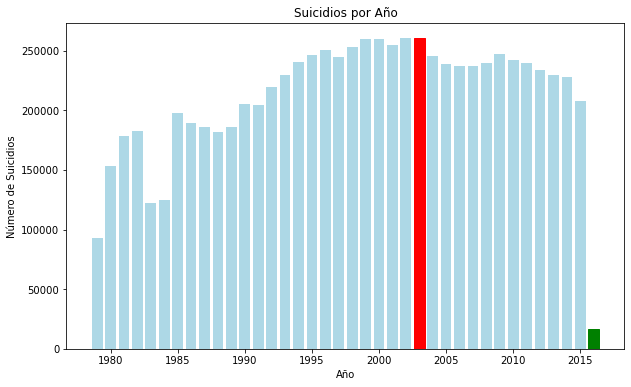

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("who_suicide_statistics.csv")

# Filtrar los datos por año
data_by_year = data.groupby('year')['suicides_no'].sum()

# Encontrar el año con el mayor y el menor número de suicidios
max_year = data_by_year.idxmax()
min_year = data_by_year.idxmin()

# Crear el histograma con colores para resaltar el máximo y el mínimo
plt.figure(figsize=(10, 6))
bars = plt.bar(data_by_year.index, data_by_year.values, color='lightblue')

# Resaltar el año con más suicidios (en rojo)
bars[max_year - data_by_year.index.min()].set_color('red')

# Resaltar el año con menos suicidios (en verde)
bars[min_year - data_by_year.index.min()].set_color('green')

plt.title('Suicidios por Año')
plt.xlabel('Año')
plt.ylabel('Número de Suicidios')
plt.show()


Este grafico es un histograma de suicidios por año con colores que resaltan el año con el mayor y el año con el menor número de suicidios. A continuación, describiré e interpretaré el gráfico:

1. **Eje X (Año)**: El eje horizontal muestra los años en el eje X. Cada barra representa un año y su posición en el eje X indica el año correspondiente.

2. **Eje Y (Número de Suicidios)**: El eje vertical muestra el número de suicidios en el eje Y. Cada barra en el gráfico representa el número de suicidios en un año específico.

3. **Colores**: Las barras del gráfico se han coloreado para resaltar el año con el mayor número de suicidios en rojo y el año con el menor número de suicidios en verde.

Interpretación:

- El gráfico muestra la distribución del número de suicidios a lo largo de los años. Puedes observar cómo varía el número de suicidios de un año a otro.

- La barra de color rojo indica el año con el mayor número de suicidios en el conjunto de datos, mientras que la barra de color verde representa el año con el menor número de suicidios.

- Al resaltar el año con el mayor y el año con el menor número de suicidios, el gráfico permite una identificación rápida de estos dos puntos destacados en la serie temporal.

- Además de los años destacados en rojo y verde, puedes ver la distribución general de suicidios a lo largo de los años, lo que puede ayudarte a identificar tendencias o fluctuaciones en la cantidad de suicidios a lo largo del tiempo.

Este gráfico es útil para identificar visualmente cuáles fueron los años excepcionales en términos de suicidios, ya sea por su alto o bajo número. Sin embargo, para un análisis más detallado de las tendencias a lo largo del tiempo, podría ser beneficioso realizar análisis estadísticos adicionales.

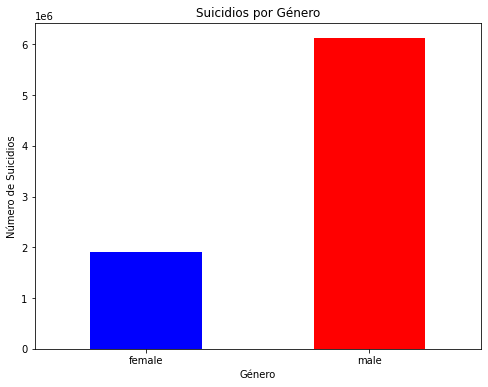

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("who_suicide_statistics.csv")

# Filtrar los datos por género
data_by_gender = data.groupby('sex')['suicides_no'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
data_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.title('Suicidios por Género')
plt.xlabel('Género')
plt.ylabel('Número de Suicidios')
plt.xticks(rotation=0)
plt.show()


Es un gráfico de barras que muestra el número total de suicidios desglosado por género (masculino y femenino). A continuación, describiré e interpretaré el gráfico:

1. **Eje X (Género)**: El eje horizontal muestra las categorías de género en el eje X. En este caso, hay dos categorías: "Masculino" y "Femenino".

2. **Eje Y (Número de Suicidios)**: El eje vertical muestra el número total de suicidios en el eje Y. Cada barra en el gráfico representa el número total de suicidios para el género correspondiente.

3. **Colores**: Las barras del gráfico están coloreadas. El color azul representa el género masculino, y el color rojo representa el género femenino.

Interpretación:

- El gráfico permite comparar visualmente el número total de suicidios entre los géneros masculino y femenino.

- Puedes observar que en este conjunto de datos, el género masculino (barra azul) tiene un número significativamente mayor de suicidios en comparación con el género femenino (barra roja).

- La diferencia en el número de suicidios entre los géneros es claramente notable. En este caso, el gráfico muestra que los suicidios son más frecuentes en el género masculino en comparación con el género femenino.

- La rotación del eje X (género) a 0 grados significa que las etiquetas de género ("Masculino" y "Femenino") están orientadas horizontalmente para una mejor legibilidad.

En resumen, el gráfico de barras destaca la diferencia en el número total de suicidios entre los géneros masculino y femenino. Es una representación efectiva para comparar estadísticas de suicidios entre diferentes grupos.

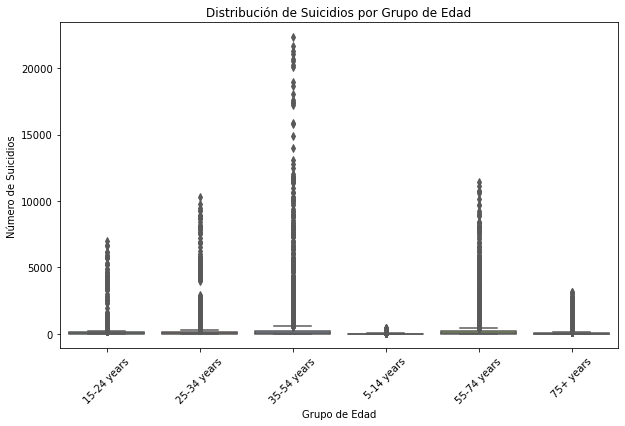

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("who_suicide_statistics.csv")

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='suicides_no', data=data, palette='Set2')
plt.title('Distribución de Suicidios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Suicidios')
plt.xticks(rotation=45)
plt.show()


El anterior es un gráfico de cajas (boxplot) que muestra la distribución de suicidios por grupo de edad. Este tipo de gráfico es útil para visualizar estadísticas descriptivas sobre la distribución de los datos en diferentes grupos. A continuación, describiré e interpretaré el gráfico:

1. **Eje X (Grupo de Edad)**: El eje horizontal muestra las categorías de grupo de edad en el eje X. Cada caja representa un grupo de edad.

2. **Eje Y (Número de Suicidios)**: El eje vertical muestra el número de suicidios en el eje Y. Las cajas del gráfico representan la distribución de los datos de número de suicidios en cada grupo de edad.

3. **Cajas (Boxplots)**: Cada caja representa un grupo de edad y muestra estadísticas sobre la distribución de los datos en ese grupo. La caja se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). La línea en el medio de la caja representa la mediana. Los "bigotes" (líneas que se extienden desde la caja) representan el rango intercuartil (IQR), y los puntos fuera de los bigotes se consideran valores atípicos.

Interpretación:

- El gráfico de cajas te permite observar la variabilidad en el número de suicidios en diferentes grupos de edad.

- Puedes identificar la mediana de suicidios en cada grupo de edad al observar la línea en el centro de cada caja. La mediana representa el valor central de la distribución.

- La extensión de la caja (IQR) indica la dispersión intercuartil de los datos en cada grupo de edad. Cuanto más grande es la caja, mayor es la variabilidad en los datos.

- Los valores atípicos se representan como puntos fuera de los bigotes. Estos puntos indican valores inusualmente altos o bajos en la distribución.

- La rotación de las etiquetas en el eje X facilita la lectura de los grupos de edad.

- El gráfico muestra que los grupos de edad "35-54 años" y "55-74 años" tienen una mayor mediana en comparación con otros grupos de edad, lo que sugiere que estos grupos pueden tener un mayor número de suicidios.

En resumen, el gráfico de cajas proporciona información sobre la distribución y variabilidad del número de suicidios en diferentes grupos de edad. Puedes identificar tendencias y valores atípicos en los datos utilizando este tipo de visualización.

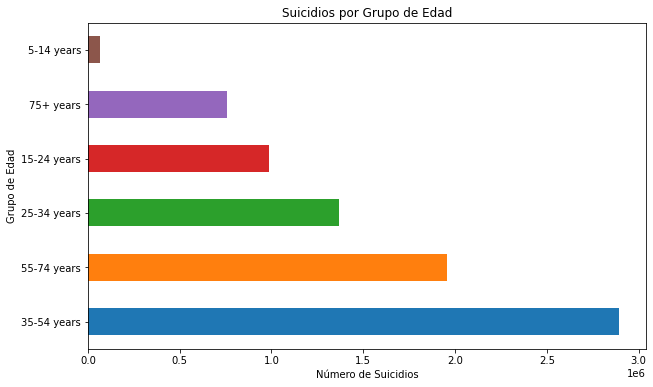

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("who_suicide_statistics.csv")

# Filtrar los datos por grupo de edad
data_by_age = data.groupby('age')['suicides_no'].sum()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
data_by_age.sort_values(ascending=False).plot(kind='barh', color=colors)
plt.title('Suicidios por Grupo de Edad')
plt.xlabel('Número de Suicidios')
plt.ylabel('Grupo de Edad')
plt.show()


Es un gráfico de barras horizontales que muestra el número total de suicidios desglosado por grupo de edad. A continuación, describiré e interpretaré el gráfico:

1. **Eje X (Número de Suicidios)**: El eje horizontal muestra el número total de suicidios en el eje X. Cada barra horizontal representa un grupo de edad y su longitud indica el número total de suicidios en ese grupo.

2. **Eje Y (Grupo de Edad)**: El eje vertical muestra las categorías de grupo de edad en el eje Y. Cada barra está etiquetada con un grupo de edad, y las barras se apilan de arriba a abajo en orden descendente según el número de suicidios.

3. **Colores**: Las barras del gráfico están coloreadas con una paleta de colores. La paleta de colores se utiliza para distinguir visualmente entre las barras y no tiene un significado numérico específico.

Interpretación:

- El gráfico de barras horizontales permite comparar visualmente el número total de suicidios entre diferentes grupos de edad.

- El grupo de edad con el mayor número de suicidios se encuentra en la parte superior del gráfico, mientras que el grupo de edad con el menor número de suicidios se encuentra en la parte inferior.

- Puedes observar claramente qué grupos de edad tienen los números más altos y más bajos de suicidios en el conjunto de datos.

- En este gráfico en particular, se ha utilizado una paleta de colores para mejorar la legibilidad y la estética del gráfico, pero los colores no tienen un significado particular en términos de interpretación numérica.

En resumen, el gráfico de barras horizontales es efectivo para visualizar y comparar el número de suicidios en diferentes grupos de edad. Puedes identificar rápidamente cuáles son los grupos de edad con más y menos suicidios en el conjunto de datos.

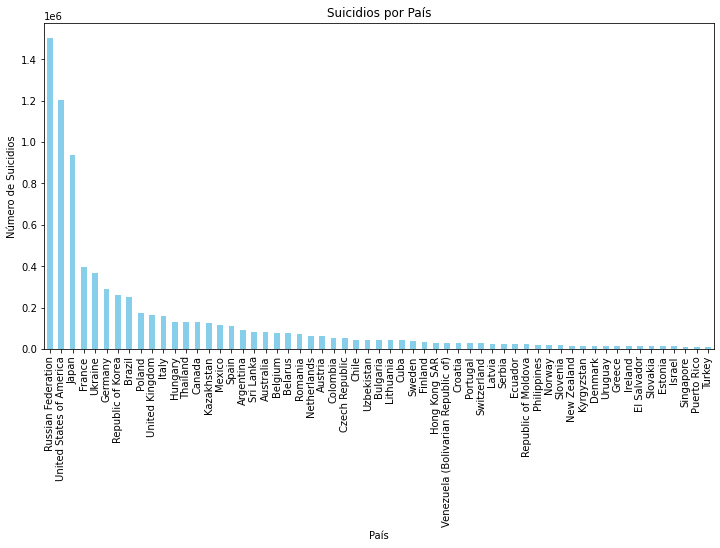

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("who_suicide_statistics.csv")

# Filtrar los datos por país
data_by_country = data.groupby('country')['suicides_no'].sum()

# Seleccionar los países con un número significativo de suicidios para visualizar
data_by_country = data_by_country[data_by_country > 10000]  # Puedes ajustar el umbral según tus necesidades

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
data_by_country.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Suicidios por País')
plt.xlabel('País')
plt.ylabel('Número de Suicidios')
plt.xticks(rotation=90)
plt.show()


El anterior es un gráfico de barras que muestra el número total de suicidios en diferentes países. En este caso, los países seleccionados tienen un número significativo de suicidios y se han visualizado en el gráfico. A continuación, describiré e interpretaré el gráfico:

1. **Eje X (País)**: El eje horizontal muestra los nombres de los países en el eje X. Cada barra en el gráfico representa un país y está etiquetada con el nombre del país correspondiente.

2. **Eje Y (Número de Suicidios)**: El eje vertical muestra el número total de suicidios en el eje Y. Cada barra en el gráfico representa el número total de suicidios en el país correspondiente.

3. **Colores**: Las barras del gráfico están coloreadas en un tono de azul claro (color 'skyblue').

Interpretación:

- El gráfico de barras permite comparar visualmente el número total de suicidios entre diferentes países seleccionados. Los países se han ordenado de mayor a menor número de suicidios.

- Los países con el mayor número de suicidios se encuentran en la parte superior del gráfico, y los países con el menor número de suicidios se encuentran en la parte inferior.

- Puedes identificar claramente cuáles son los países con un alto número de suicidios en el conjunto de datos.

- El gráfico muestra que algunos países tienen un número significativo de suicidios en comparación con otros. Esto puede sugerir diferencias en las tasas de suicidio entre países o regiones.

- La rotación de las etiquetas en el eje X (país) a 90 grados facilita la lectura de los nombres de los países.

En resumen, el gráfico de barras es útil para visualizar y comparar el número total de suicidios entre diferentes países seleccionados. Te permite identificar rápidamente cuáles son los países con los números más altos de suicidios en el conjunto de datos, lo que puede ser valioso para el análisis y la toma de decisiones.

### Referencias:

https://www.kaggle.com/datasets/szamil/who-suicide-statistics/

https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/tree/main/proyectos/eda#proyecto-de-an%C3%A1lisis-eda

https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/blob/main/actividades/08_Git_and_GitHub.md